# Practica 4 Ejercicio 3

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

# training data

In [6]:
def map_logistico(x_t):
    x_sig= 4 * x_t * (1-x_t)
    return x_sig

# def data_t(n):
#     x = [0.4]
#     y = []
#     while x[-1] < 1:
#     # for i in range(n):
#         y.append(map_logistico(x[-1]))
#         x.append(y[-1])
    
#     return x[:-1], y

# def get_map_log(n):
#     data = pd.read_csv('map_logistico_10k.csv')
#     x = data['x']
#     y = data['y']
#     indices = np.random.choice(len(x), n, replace=False)
#     return x[indices], y[indices]

def get_map_log2(n):
    #x es un array de n elementos, tomados al azar entre 0 y 1
    x = np.random.rand(n)
    y = map_logistico(x)
    return x, y

# Arquitectura

In [7]:
def RedNeuronal(train,val, eph=1000, lr=0.01):
    x_train, y_train = train
    x_val, y_val = val
    # creo arquitectura de la red
    inputs  = tf.keras.Input(shape=(1, ), name="Input") # capa de entrada
    layer_1 = tf.keras.layers.Dense(5, activation='sigmoid')(inputs) # capa oculta
    concat  = tf.keras.layers.Concatenate()([inputs, layer_1]) # concatenacion de la capa de entrada y la capa oculta
    outputs = tf.keras.layers.Dense(1, activation='linear')(concat) # capa de salida conectada con oculta y entrada
    
    #creo el modelo
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(tf.keras.optimizers.Adam(lr),loss='mean_squared_error', metrics=['accuracy']) #compilo el modelo

    history = model.fit(x_train, y_train, epochs=eph, validation_data=(x_val, y_val))
    return model, history

# N = 1000

In [8]:
# N = 1000
# x_train, y_train = get_map_log2(N)
# x_val, y_val = get_map_log2(N)
# model_100, hist_100 = RedNeuronal([x_train, y_train],[x_val,y_val], eph=1000)

In [9]:
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.plot(x_train, y_train,'o',markersize=1, label='Datos de entrenamiento')
# x = np.linspace(0,1,1000)
# plt.plot(x, model_100.predict(x), label='Predicción')
# plt.legend()
# plt.grid()
# plt.xlabel('x(t)')
# plt.ylabel('x(t+1)')
# plt.title('Mapeo Logístico')

# plt.subplot(1,2,2)
# #grafico el loss y el val_loss
# plt.plot(hist_100.history['loss'], label='loss')
# plt.plot(hist_100.history['val_loss'], label='val_loss')
# plt.legend()
# plt.grid()
# plt.xlabel('Epoch')
# plt.ylabel('Error cuadrático medio')
# plt.title('Loss y Val_loss')

# N = 5

In [15]:
N = 5
x_train, y_train = get_map_log2(N)
x_val, y_val = get_map_log2(N)
model_5, hist_5 = RedNeuronal([x_train, y_train],[x_val,y_val], eph=3000, lr=0.01)

Epoch 1/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step - accuracy: 0.0000e+00 - loss: 0.1134 - val_accuracy: 0.0000e+00 - val_loss: 0.5847
Epoch 2/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0000e+00 - loss: 0.0840 - val_accuracy: 0.0000e+00 - val_loss: 0.5155
Epoch 3/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 0.0603 - val_accuracy: 0.0000e+00 - val_loss: 0.4534
Epoch 4/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 0.0424 - val_accuracy: 0.0000e+00 - val_loss: 0.3989
Epoch 5/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 0.0300 - val_accuracy: 0.0000e+00 - val_loss: 0.3522
Epoch 6/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 0.0227 - val_accuracy: 0.0000e+00 - val_loss: 0.3133
Epoch 7/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 0.0198 - val_accuracy: 0.0000e+00 - val_loss: 0.2823
Epoch 8/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - a

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


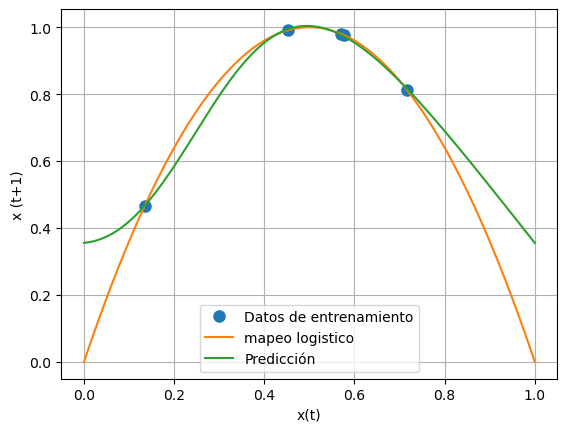

[0.45154163 0.56994009 0.5767839  0.13506641 0.71703851]


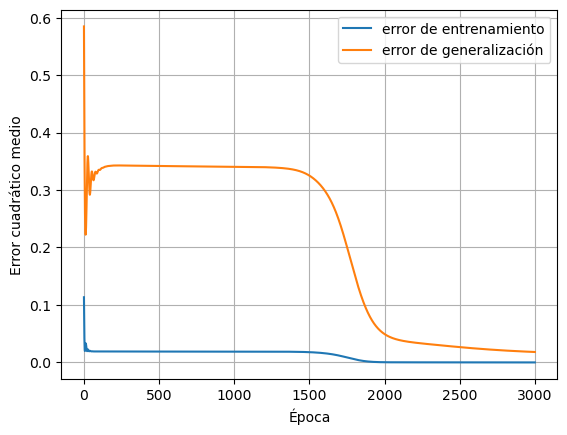

In [20]:
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
x = np.linspace(0,1,1000)
plt.plot(x_train, y_train,'o',markersize=8, label='Datos de entrenamiento')
plt.plot(x, map_logistico(x), label='mapeo logistico')
plt.plot(x, model_5.predict(x), label='Predicción')
plt.legend()
plt.grid()
plt.xlabel('x(t)')
plt.ylabel('x (t+1)')
# plt.title('Mapeo Logístico')
plt.savefig('Mapeo_logistico_5.png', dpi=300, bbox_inches='tight')
plt.show()
# plt.subplot(1,2,2)
#grafico el loss y el val_loss
plt.plot(hist_5.history['loss'], label='error de entrenamiento')
plt.plot(hist_5.history['val_loss'], label='error de generalización')
plt.legend()
plt.grid()
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')
# plt.title('Error cuadrático medio')
print(x_train)

plt.savefig('Error_5.png', dpi=300, bbox_inches='tight')

# N=10

In [21]:
N = 10
x_train, y_train = get_map_log2(N)
x_val, y_val = get_map_log2(N)
model_10, hist_10 = RedNeuronal([x_train, y_train],[x_val,y_val], eph=3000, lr=0.01)

Epoch 1/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step - accuracy: 0.0000e+00 - loss: 0.9173 - val_accuracy: 0.0000e+00 - val_loss: 0.6891
Epoch 2/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 0.8384 - val_accuracy: 0.0000e+00 - val_loss: 0.6177
Epoch 3/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 0.7641 - val_accuracy: 0.0000e+00 - val_loss: 0.5512
Epoch 4/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 0.6944 - val_accuracy: 0.0000e+00 - val_loss: 0.4895
Epoch 5/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 0.6293 - val_accuracy: 0.0000e+00 - val_loss: 0.4327
Epoch 6/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 0.5689 - val_accuracy: 0.0000e+00 - val_loss: 0.3808
Epoch 7/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 0.5131 - val_accuracy: 0.0000e+00 - val_loss: 0.3337
Epoch 8/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - a

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


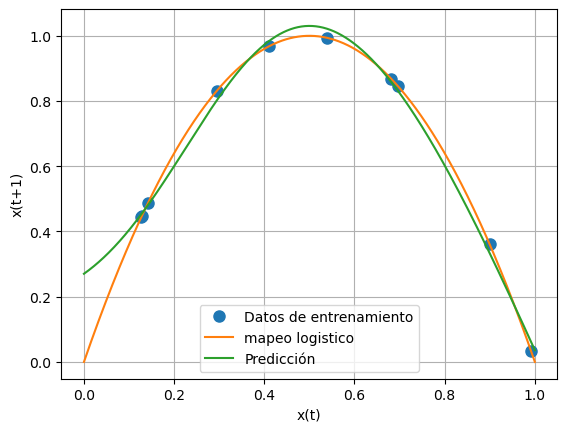

[0.14247952 0.12823966 0.68143942 0.69693343 0.89980097 0.5391987
 0.41109336 0.99159246 0.29469141 0.12717877]


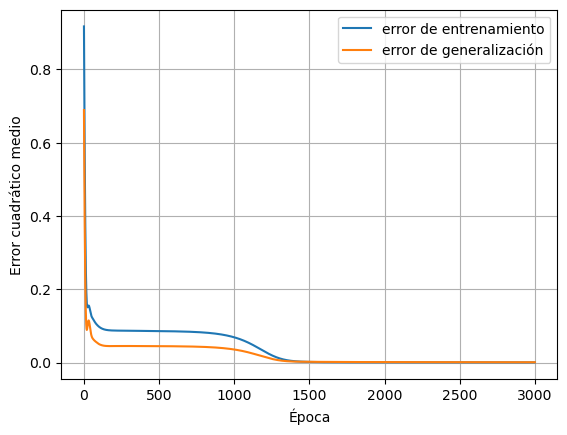

In [22]:
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
x = np.linspace(0,1,1000)
plt.plot(x_train, y_train,'o',markersize=8, label='Datos de entrenamiento')
plt.plot(x, map_logistico(x), label='mapeo logistico')
plt.plot(x, model_10.predict(x), label='Predicción')
plt.legend()
plt.grid()
plt.xlabel('x(t)')
plt.ylabel('x(t+1)')
# plt.title('Mapeo Logístico')
# plt.subplot(1,2,2)
plt.savefig('Mapeo_logistico_10.png', dpi=300, bbox_inches='tight')
plt.show()

#grafico el loss y el val_loss
plt.plot(hist_10.history['loss'], label='error de entrenamiento')
plt.plot(hist_10.history['val_loss'], label='error de generalización')
plt.legend()
plt.grid()
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')
# plt.title('Error cuadrático medio')
print(x_train)

plt.savefig('Error_10.png', dpi=300, bbox_inches='tight')

#   N = 100

In [24]:
N = 100
x_train, y_train = get_map_log2(N)
x_val, y_val = get_map_log2(N)
model_100, hist_100 = RedNeuronal([x_train, y_train],[x_val,y_val], eph=3000, lr=0.01)

Epoch 1/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.0000e+00 - loss: 1.0229 - val_accuracy: 0.0000e+00 - val_loss: 0.8170
Epoch 2/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 0.7351 - val_accuracy: 0.0000e+00 - val_loss: 0.5520
Epoch 3/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.5227 - val_accuracy: 0.0000e+00 - val_loss: 0.3590
Epoch 4/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 0.3127 - val_accuracy: 0.0000e+00 - val_loss: 0.2264
Epoch 5/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.2127 - val_accuracy: 0.0000e+00 - val_loss: 0.1452
Epoch 6/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.1448 - val_accuracy: 0.0000e+00 - val_loss: 0.1037
Epoch 7/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.1228 - val_accuracy: 0.0000e+00 - val_loss: 0.0866
Epoch 8/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - ac

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


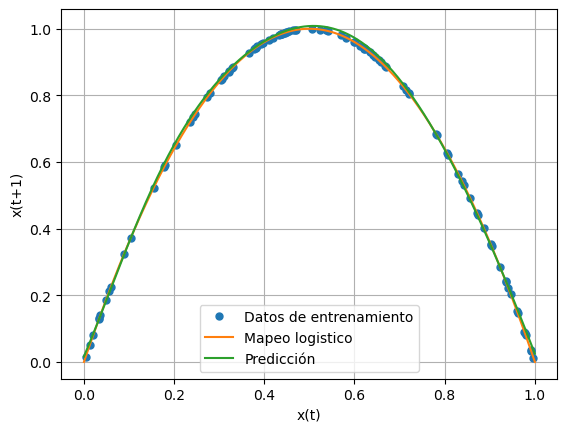

[0.32808658 0.31130609 0.44944112 0.37947607 0.90327867 0.38460143
 0.44014548 0.80528709 0.44830293 0.37744341 0.99168896 0.32062227
 0.33058918 0.30657469 0.59970488 0.84281673 0.23538805 0.20408157
 0.6335262  0.4366213  0.05978705 0.46941177 0.43651438 0.18020466
 0.38120686 0.36555782 0.72156768 0.94646408 0.44535241 0.03429569
 0.978142   0.92270818 0.61331016 0.45517122 0.78131713 0.87377861
 0.64499991 0.50478317 0.17781916 0.65326983 0.60025528 0.97926339
 0.66780209 0.93547063 0.80819592 0.62109473 0.28028692 0.90412758
 0.56918502 0.08927582 0.04853013 0.96157221 0.67013069 0.97692508
 0.05608669 0.24709017 0.9361196  0.9967483  0.99128775 0.39640114
 0.53593867 0.0334318  0.30363828 0.01298907 0.44326725 0.27305546
 0.10372189 0.62152262 0.52444034 0.15474891 0.64122352 0.46745301
 0.43685453 0.7144582  0.58147786 0.83028695 0.87174528 0.85610819
 0.62210697 0.83765193 0.54044776 0.90187152 0.24244897 0.00375834
 0.65795483 0.62252865 0.02055299 0.03670551 0.94097494 0.4331

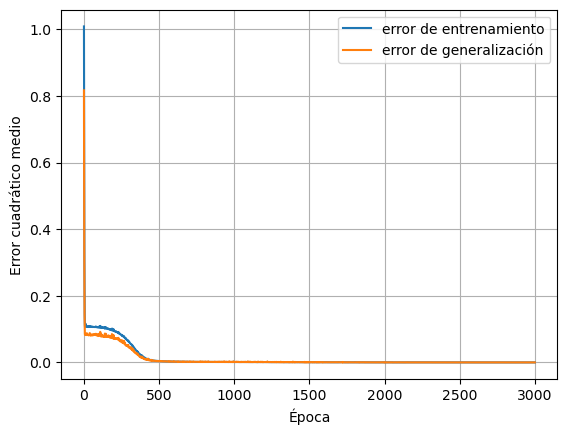

In [25]:
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
x = np.linspace(0,1,1000)
plt.plot(x_train, y_train,'o',markersize=5, label='Datos de entrenamiento')
plt.plot(x, map_logistico(x), label='Mapeo logistico')
plt.plot(x, model_100.predict(x), label='Predicción')
plt.legend()
plt.grid()
plt.xlabel('x(t)')
plt.ylabel('x(t+1)')
# plt.title('Mapeo Logístico')
# plt.subplot(1,2,2)
plt.savefig('Mapeo_logistico_100.png', dpi=300, bbox_inches='tight')
plt.show()

#grafico el loss y el val_loss
plt.plot(hist_100.history['loss'], label='error de entrenamiento')
plt.plot(hist_100.history['val_loss'], label='error de generalización')
plt.legend()
plt.grid()
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')
# plt.title('Error cuadrático medio')
print(x_train)

plt.savefig('Error_100.png', dpi=300, bbox_inches='tight')